# Association Rules visualisation


Association rules are if/then statements that help uncover relationships between seemingly unrelated data
in a relational database or other information repository. An example of an association rule would be "If a customer buys a dozen eggs, he is 80% likely to also purchase milk."

An association rule has two parts, an antecedent (if) and a consequent (then). An antecedent is an item found in the data. A consequent is an item that is found in combination with the antecedent.

Association rules are created by analyzing data for frequent if/then patterns and using the criteria support and confidence to identify the most important relationships. Support is an indication of how frequently the items appear in the database. Confidence indicates the number of times the if/then statements have been found to be true.
The lift of a rule is defined as the ratio of the observed support to that expected if the two items were independent.

In data mining, association rules are useful for analyzing and predicting customer behavior. They play an important part in shopping basket data analysis, product clustering, catalog design and store layout.

### Install R packages 

In [1]:
install.packages("arules", lib="/opt/conda/lib/R/library", repo="http://cran.us.r-project.org")


also installing the dependencies ‘lattice’, ‘Matrix’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("arulesViz", lib="/opt/conda/lib/R/library", repo="http://cran.us.r-project.org")

also installing the dependencies ‘modeltools’, ‘nnet’, ‘DEoptimR’, ‘codetools’, ‘iterators’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘class’, ‘diptest’, ‘mvtnorm’, ‘robustbase’, ‘kernlab’, ‘trimcluster’, ‘gridExtra’, ‘xtable’, ‘zoo’, ‘foreach’, ‘fpc’, ‘whisker’, ‘viridis’, ‘gtools’, ‘gdata’, ‘caTools’, ‘KernSmooth’, ‘pkgmaker’, ‘rngtools’, ‘gridBase’, ‘doParallel’, ‘yaml’, ‘mime’, ‘curl’, ‘openssl’, ‘DBI’, ‘BH’, ‘lmtest’, ‘TSP’, ‘qap’, ‘cluster’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘NMF’, ‘irlba’, ‘htmltools’, ‘htmlwidgets’, ‘httr’, ‘viridisLite’, ‘base64enc’, ‘tidyr’, ‘dplyr’, ‘hexbin’, ‘purrr’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘DT’, ‘plotly’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library("arules")
library("arulesViz")

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


### Examine dataset Groceries

In [4]:
data("Groceries")
summary(Groceries)


transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

### Perform Association Rules analysis with a priori algorithm

In [5]:
 rules <- apriori(Groceries, parameter=list(support=0.001, confidence=0.5))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [5668 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### Inspect results

In [6]:
 inspect(head(sort(rules, by ="lift"),3))

    lhs                             rhs              support     confidence
[1] {Instant food products,soda} => {hamburger meat} 0.001220132 0.6315789 
[2] {soda,popcorn}               => {salty snack}    0.001220132 0.6315789 
[3] {flour,baking powder}        => {sugar}          0.001016777 0.5555556 
    lift    
[1] 18.99565
[2] 16.69779
[3] 16.40807


### Create visualisations 

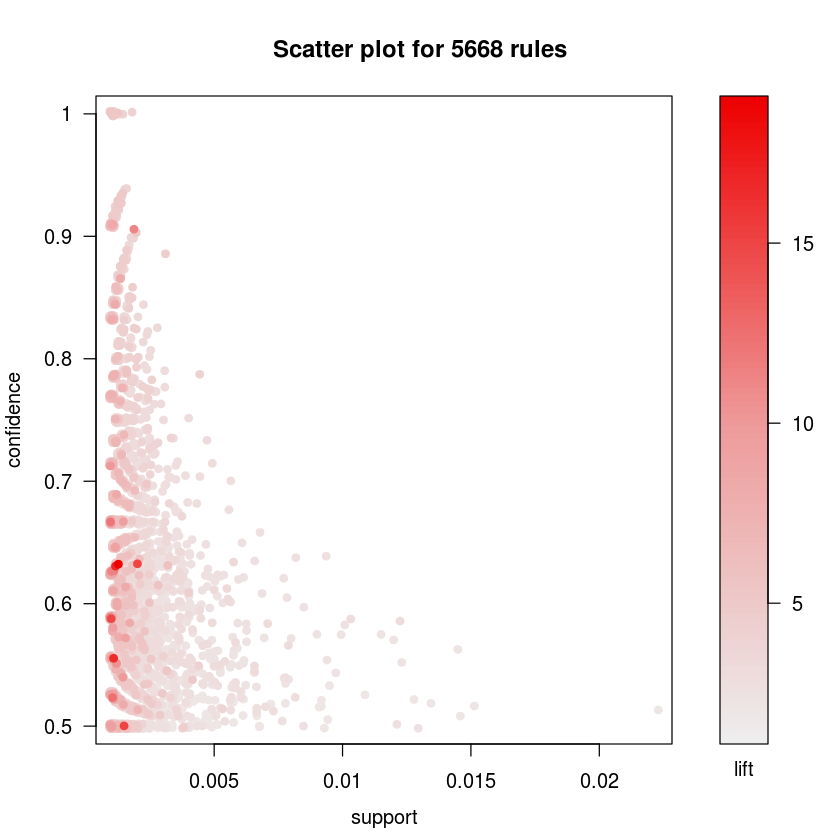

In [7]:
 plot(rules)


In [8]:
 subrules <- rules[quality(rules)$confidence > 0.8]


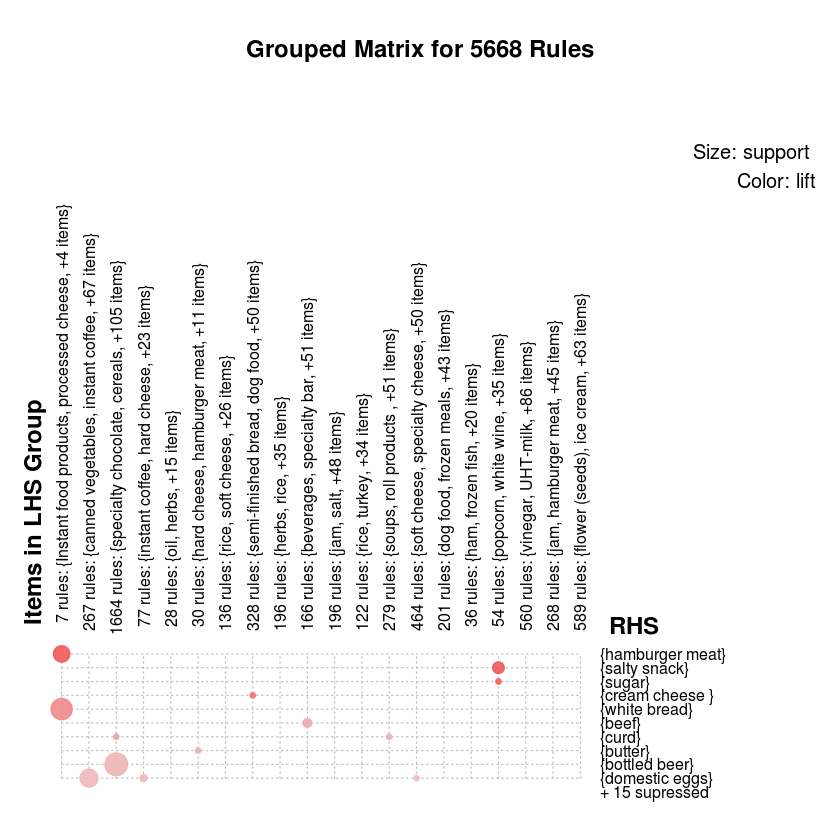

In [9]:
plot(rules, method="grouped")


In [11]:
subrules2 <- head(sort(rules, by="lift"), 10)


In [12]:
inspect(subrules2)

     lhs                        rhs                  support confidence     lift
[1]  {Instant food products,                                                    
      soda}                  => {hamburger meat} 0.001220132  0.6315789 18.99565
[2]  {soda,                                                                     
      popcorn}               => {salty snack}    0.001220132  0.6315789 16.69779
[3]  {flour,                                                                    
      baking powder}         => {sugar}          0.001016777  0.5555556 16.40807
[4]  {ham,                                                                      
      processed cheese}      => {white bread}    0.001931876  0.6333333 15.04549
[5]  {whole milk,                                                               
      Instant food products} => {hamburger meat} 0.001525165  0.5000000 15.03823
[6]  {other vegetables,                                                         
      curd,                 

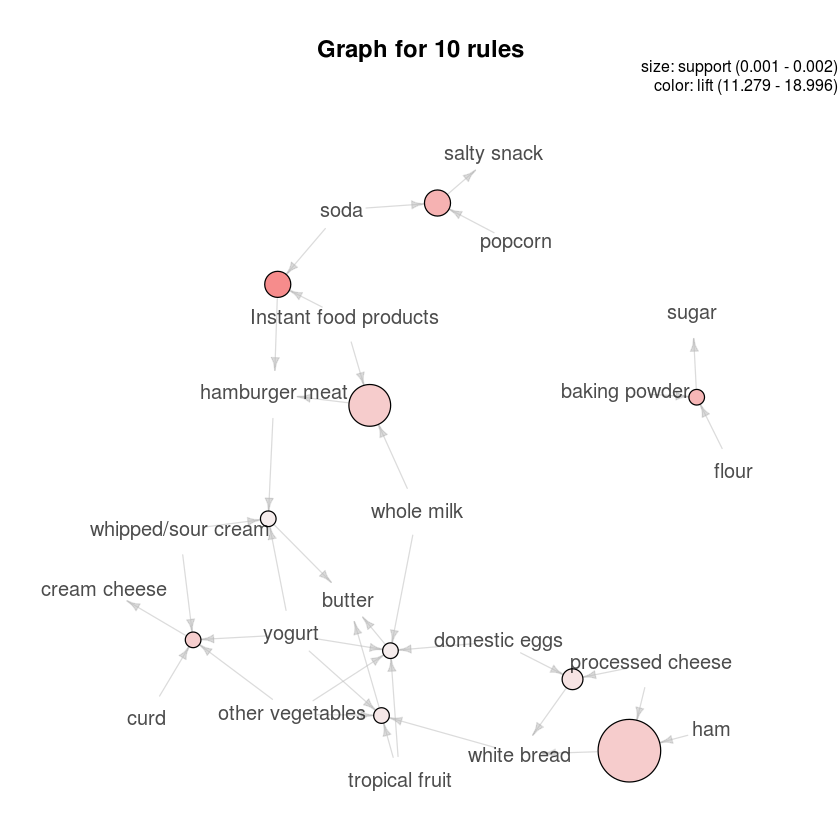

In [13]:
plot(subrules2, method="graph")


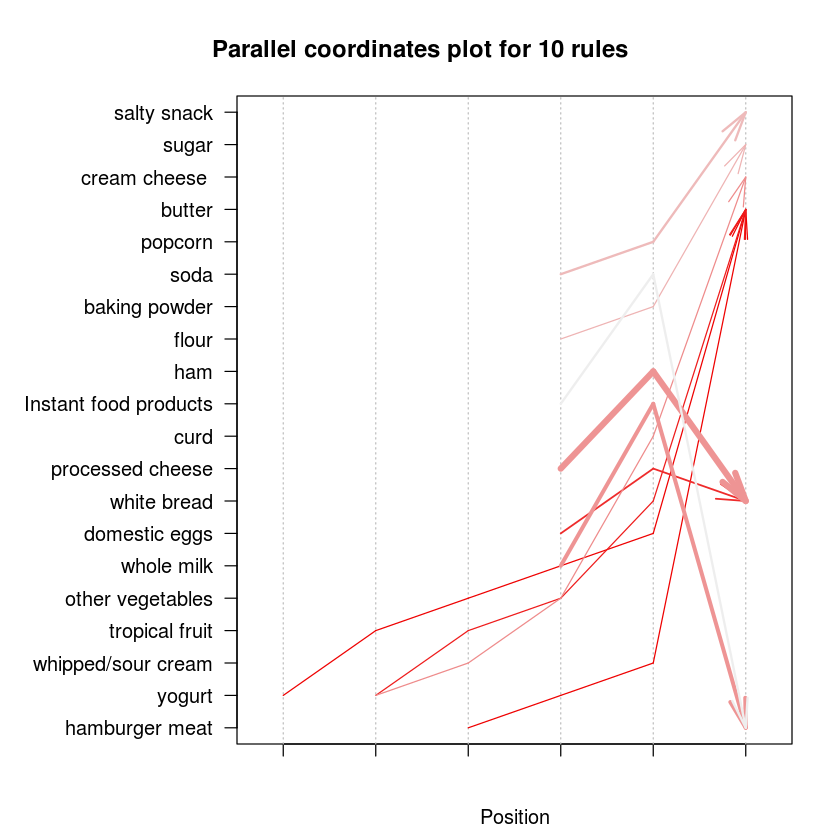

In [14]:
plot(subrules2, method="paracoord")


checked